In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import Dataset,DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.autograd import Variable
import cv2
import numpy as np
import os, random,sys


# Build an Autoencoder for a human face dataset

We will use a dataset containig images of people and train an autoencoder on it. 

## Step 1

Download and unzip the ``lfw.zip`` file . Adjust the ``path`` variable so that it contains the address of the unzipped folder. We will create a dataloader from this folder.


In [2]:

path = "C:/Users/RebeccaHJCui/457/lfw"

In [3]:

transform = transforms.Compose([transforms.ToTensor()]) 
dataloader = DataLoader(ImageFolder(path, transform,),batch_size=32, shuffle=True)


This project is compute intensive. If you have a cuda or mps device on your laptop make sure you use that in the training.

In [4]:
if torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    print ("mps device not found.")


mps device not found.


torch.Size([250, 250, 3])


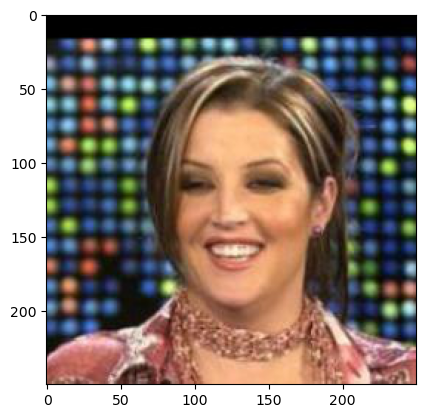

In [5]:
for x,y in dataloader:
    x = x[0].permute(1, 2, 0)
    print(x.shape)
    plt.imshow(x)
    break

## Step 2
Each datapoint is an image. Get a sample of the data and print its dimensions and explain what each dimension means.

In [6]:
x.shape
# highth x width x color channel

torch.Size([250, 250, 3])

In [7]:
x = x.permute(2, 0, 1).reshape(1,3,250,250)
x.shape
# channel x highth x weight

torch.Size([1, 3, 250, 250])

# Step 3

Create a new pytorch model calss for your autoencoder. You can use Conv2d, MaxPool2d, BatchNorm2d, ConvTranspose2d and Linear Layers as as well as activation functions. Optionally, you can use UpSample, AveragePool2d and Interpolate2d as well.

**Create seperate functions for the encoder and decoder.**

In [8]:
class AE(nn.Module):
    
    def __init__(self):
        super(AE, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Conv2d(3,9,3, stride=3, padding=0),  
            nn.ReLU(True),
            nn.Conv2d(9,12,3, stride=3, padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=1),
            nn.Conv2d(12,16,3, stride=3, padding=1),
            nn.ReLU(True),
        )
        
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(16, 8, 3, stride=4, padding=1), 
            nn.ReLU(True),
            nn.ConvTranspose2d(8, 6, 3, stride=4, padding=1),  
            nn.ReLU(True),
            nn.ConvTranspose2d(6, 3, 2, stride=2, padding=4
                              ), 
            nn.Tanh()
        )

    def forward(self, x):
        h = self.encoder(x)
        out = self.decoder(h)
        return out

       

## Step 4
Create an instance of the class, pass an image to the model, print the shape of the output of the **encoder** and the **decoder**. Check the dimensions and make sure your forward path is working properly.

In [9]:
m=AE()
print('x shape= ', x.shape)
z = m.encoder(x)
print('z shape=', z.shape)
re_constructed = m.decoder(z)
re_constructed.shape


x shape=  torch.Size([1, 3, 250, 250])
z shape= torch.Size([1, 16, 9, 9])


torch.Size([1, 3, 250, 250])

##  Step 5
Print total number of parameters in the model, explain what loss function you should use, create an optimizer for training

In [10]:
for p in m.parameters():
    print(p.numel()) # number of elements

    

243
9
972
12
1728
16
1152
8
432
6
72
3


In [11]:
optim = torch.optim.Adam(m.parameters(), lr=0.01)

In [12]:
# I use MSE for loss function
loss_function = nn.MSELoss()

##  Step 6
Write a training loop and start trainng the model for several epochs. Report the loss value at the end of each epoch and monitor it. If your loss is not decreasing what do you have to do to troubleshoot it ?

In [13]:
num_epoch = 50
for epoch in range(num_epoch):
    loss = 0
    for data in dataloader:
        x,y = data
        #print(x.shape)
        out = m(x)
        #print(out.shape)
        loss = loss_function(out,x.data)
        optim.zero_grad()
        loss.backward()
        optim.step()
        loss += loss.data
    print(f'epoch [{epoch + 1}/{num_epoch}], loss:{loss.item(): .4f}')

epoch [1/50], loss: 0.1267
epoch [2/50], loss: 0.1293
epoch [3/50], loss: 0.1285
epoch [4/50], loss: 0.1457
epoch [5/50], loss: 0.1314
epoch [6/50], loss: 0.1192
epoch [7/50], loss: 0.1246
epoch [8/50], loss: 0.1235
epoch [9/50], loss: 0.1451
epoch [10/50], loss: 0.1157
epoch [11/50], loss: 0.1254
epoch [12/50], loss: 0.1204
epoch [13/50], loss: 0.1216
epoch [14/50], loss: 0.1261
epoch [15/50], loss: 0.1230
epoch [16/50], loss: 0.1236
epoch [17/50], loss: 0.1315
epoch [18/50], loss: 0.1159
epoch [19/50], loss: 0.1341
epoch [20/50], loss: 0.1256
epoch [21/50], loss: 0.1285
epoch [22/50], loss: 0.1287
epoch [23/50], loss: 0.1207
epoch [24/50], loss: 0.1407
epoch [25/50], loss: 0.1274
epoch [26/50], loss: 0.1247
epoch [27/50], loss: 0.1280
epoch [28/50], loss: 0.1298
epoch [29/50], loss: 0.1189
epoch [30/50], loss: 0.1282
epoch [31/50], loss: 0.1433
epoch [32/50], loss: 0.1297
epoch [33/50], loss: 0.1351
epoch [34/50], loss: 0.1531
epoch [35/50], loss: 0.1346
epoch [36/50], loss: 0.1393
e

##  Step 7

Take a random image from the dataset and plot it against the reconstructed (encoded + decoded) image.

torch.Size([250, 250, 3])
torch.Size([1, 3, 250, 250])


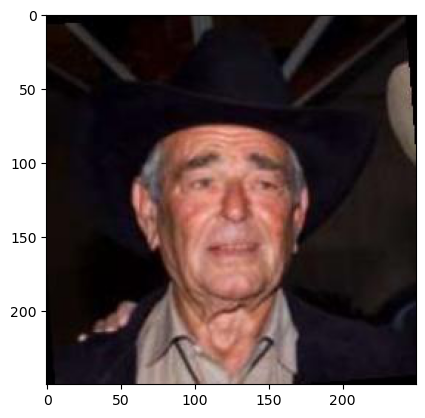

In [51]:
for x,y in dataloader:
    x = x[7].permute(1, 2, 0)
    print(x.shape)
    plt.imshow(x)
    break

x = x.permute(2, 0, 1).reshape(1,3,250,250)
print(x.shape)

torch.Size([1, 3, 250, 250])


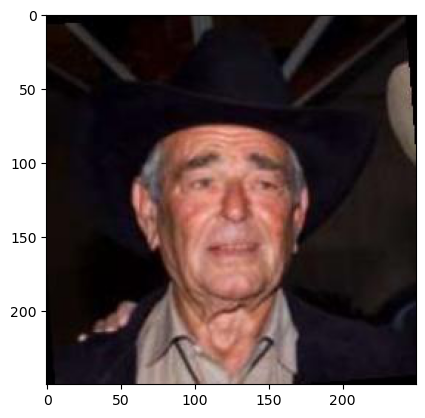

In [52]:
print(x.shape)
plt.imshow(x.squeeze().permute(1,2,0))

    

In [53]:
xt =m(x)
print(xt)
xt.shape

tensor([[[[0.4095, 0.4096, 0.4095,  ..., 0.4096, 0.4095, 0.4096],
          [0.4097, 0.4098, 0.4097,  ..., 0.4098, 0.4097, 0.4098],
          [0.4095, 0.4096, 0.0236,  ..., 0.0418, 0.4095, 0.4096],
          ...,
          [0.4097, 0.4098, 0.0329,  ..., 0.0536, 0.4097, 0.4098],
          [0.4095, 0.4096, 0.4095,  ..., 0.4096, 0.4095, 0.4096],
          [0.4097, 0.4098, 0.4097,  ..., 0.4098, 0.4097, 0.4098]],

         [[0.3427, 0.3428, 0.3427,  ..., 0.3428, 0.3427, 0.3428],
          [0.3429, 0.3429, 0.3429,  ..., 0.3429, 0.3429, 0.3429],
          [0.3427, 0.3428, 0.0087,  ..., 0.0468, 0.3427, 0.3428],
          ...,
          [0.3429, 0.3429, 0.0376,  ..., 0.0614, 0.3429, 0.3429],
          [0.3427, 0.3428, 0.3427,  ..., 0.3428, 0.3427, 0.3428],
          [0.3429, 0.3429, 0.3429,  ..., 0.3429, 0.3429, 0.3429]],

         [[0.3076, 0.3077, 0.3076,  ..., 0.3077, 0.3076, 0.3077],
          [0.3077, 0.3078, 0.3077,  ..., 0.3078, 0.3077, 0.3078],
          [0.3076, 0.3077, 0.0080,  ..., 0

torch.Size([1, 3, 250, 250])

torch.Size([1, 3, 250, 250])


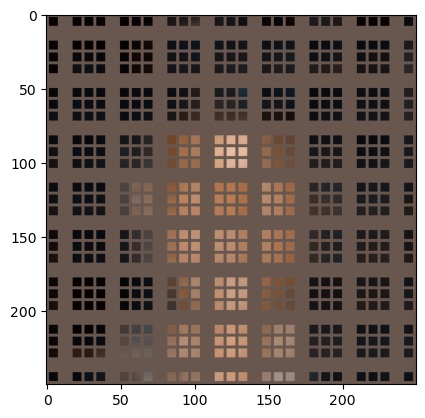

In [54]:
print(xt.shape)
plt.imshow(xt.squeeze().permute(1,2,0).detach().numpy())


##  Step 8

In step 7, add a small normaly distrubuted noise to the latent (hidden) representation of the input image and then decode it again. How is adding noise affecting the decoded image ?

tensor([[[[0.4095, 0.4096, 0.4095,  ..., 0.4096, 0.4095, 0.4096],
          [0.4097, 0.4098, 0.4097,  ..., 0.4098, 0.4097, 0.4098],
          [0.4095, 0.4096, 0.0236,  ..., 0.0279, 0.4095, 0.4096],
          ...,
          [0.4097, 0.4098, 0.0345,  ..., 0.0236, 0.4097, 0.4098],
          [0.4095, 0.4096, 0.4095,  ..., 0.4096, 0.4095, 0.4096],
          [0.4097, 0.4098, 0.4097,  ..., 0.4098, 0.4097, 0.4098]],

         [[0.3427, 0.3428, 0.3427,  ..., 0.3428, 0.3427, 0.3428],
          [0.3429, 0.3429, 0.3429,  ..., 0.3429, 0.3429, 0.3429],
          [0.3427, 0.3428, 0.0087,  ..., 0.0221, 0.3427, 0.3428],
          ...,
          [0.3429, 0.3429, 0.0427,  ..., 0.0087, 0.3429, 0.3429],
          [0.3427, 0.3428, 0.3427,  ..., 0.3428, 0.3427, 0.3428],
          [0.3429, 0.3429, 0.3429,  ..., 0.3429, 0.3429, 0.3429]],

         [[0.3076, 0.3077, 0.3076,  ..., 0.3077, 0.3076, 0.3077],
          [0.3077, 0.3078, 0.3077,  ..., 0.3078, 0.3077, 0.3078],
          [0.3076, 0.3077, 0.0080,  ..., 0

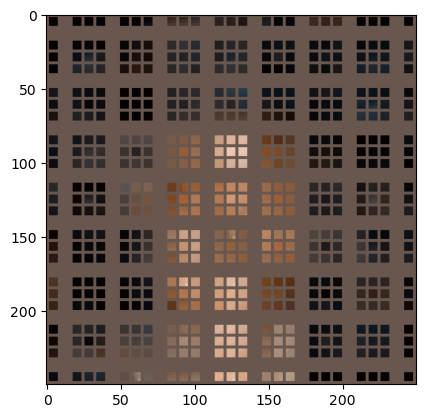

In [56]:
zN = m.encoder(x)
zN = zN + torch.randn(zN.shape)
output = m.decoder(zN)
print(output)
plt.imshow(output.squeeze().permute(1,2,0).detach().numpy())